# NETWORK SCIENCE VK PROJECT

connecting some stuff

In [1]:
import requests
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
import operator
import pandas as pd
import numpy as np
import itertools
import scipy.spatial as spt
import seaborn as sns
sns.set()
%matplotlib inline

Всякие полезные функции для API

In [35]:
# функция возвращает список друзей
def get_friends_ids(user_id):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&v=5.52' 
    # также вы можете добавить access_token в запрос, получив его через OAuth 2.0
    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        #print json_response.get('error')
        return list()
    return json_response[u'response']

In [36]:
# функция возвращает имя юзера
def find_name(id_interest):
    resp=requests.get('https://api.vk.com/method/users.get?user_ids={}&v=5.52'.format(id_interest)).json()[u'response']
    return resp[0][u'first_name'].strip()+' '+resp[0][u'last_name'].strip()

# функция пишет имя
def print_info_about(i, id_interest, G):  
    resp=requests.get('https://api.vk.com/method/users.get?user_ids={}&v=5.52'.format(id_interest)).json()[u'response']
    print(str(i)+". "+resp[0][u'first_name'].strip()+' '+resp[0][u'last_name'].strip()+' '+str(G.degree()[id_interest]))

Начинаем создавать граф

In [ ]:
graph = {}
friend_ids = get_friends_ids(11759642)  # мой id

In [ ]:
num = 1
for friend_id in friend_ids["items"]:
   # print (str(num)+". "'Processing id: ', friend_id)
    friend_friends = get_friends_ids(friend_id)
    if len(friend_friends) > 0:
        graph[friend_id] = friend_friends["items"]
    num += 1

In [ ]:
g = nx.Graph(directed=False)

In [ ]:
myfriends = list(graph.keys())
for i in myfriends:
    g.add_node(i)
    for j in graph[i]:
        if i != j and j in myfriends:
            g.add_edge(i, j)

Поскольку есть некрасивые отдельные вершины, не связанные ни с кем, я просто сразу беру максимальный подграф. 95% друзей туда входят. Но вообще это делать необязательно

In [ ]:
g = g.subgraph(max(nx.connected_component_subgraphs(g), key=len))

Запись графа

In [189]:
networkx.write_gml(g, "network.gml")

Запись графа с именами вместо ID

In [190]:
G = nx.relabel_nodes(g, find_name)

In [191]:
networkx.write_gml(G, "network1.gml")

## ЗДЕСЬ ЗАКАНЧИВАЕТСЯ РАБОТА С API И НАЧИНАЕТСЯ АНАЛИЗ

Читаем графы

In [4]:
'''
G1 = nx.read_gml('network.gml')
G = nx.read_gml('network1.gml')
'''

In [2]:
G1 = nx.read_gml('network.gml')
G = nx.read_gml('network1.gml')

Смотрим всякие degree

In [33]:
k = nx.degree(G)
k1 = nx.degree(G1)

In [4]:
len(G.nodes()), len(G.edges())

(424, 5161)

In [25]:
def plot_pdf(bincenters0, yh0, n):
    yh1 = np.array(yh0) / n
    plt.plot(bincenters0, yh1, '-', lw=2)
    plt.ylabel('count')
    plt.xlabel('degree')
    return 

def plot_cdf(degrees):
    degrees = sorted(degrees)
    cdf, degree, cur_sum, i, max_val = [], 0, 0, 0, sum(degrees)
    while i < len(degrees):
        if degree > degrees[i]:
            while degree > degrees[i]:
                cur_sum += degrees[i]
                i += 1
                if i == len(degrees):
                    break
        degree += 1
        cdf.append(cur_sum / max_val)
    plt.plot(np.arange(0, max(degrees)+1), cdf[:-1], '-', lw=2)
    plt.ylabel('count')
    plt.xlabel('degree')
    return

def get_bincenters(degrees, bins):
    yh0, binEdges=np.histogram(degrees, bins=bins)
    bincenters0 = 0.5*(binEdges[1:]+binEdges[:-1])
    return bincenters0, yh0

In [6]:
degrees = list(nx.degree(G).values())

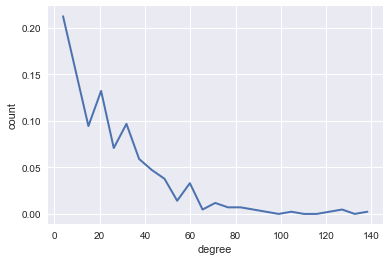

In [26]:
hist0 = get_bincenters(degrees, 25)
plot_pdf(hist0[0], hist0[1], len(degrees))

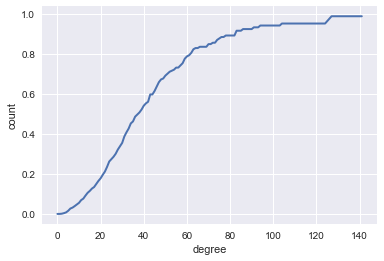

In [27]:
plot_cdf(degrees)

Заплотим некрасивый график (Gephi круче)

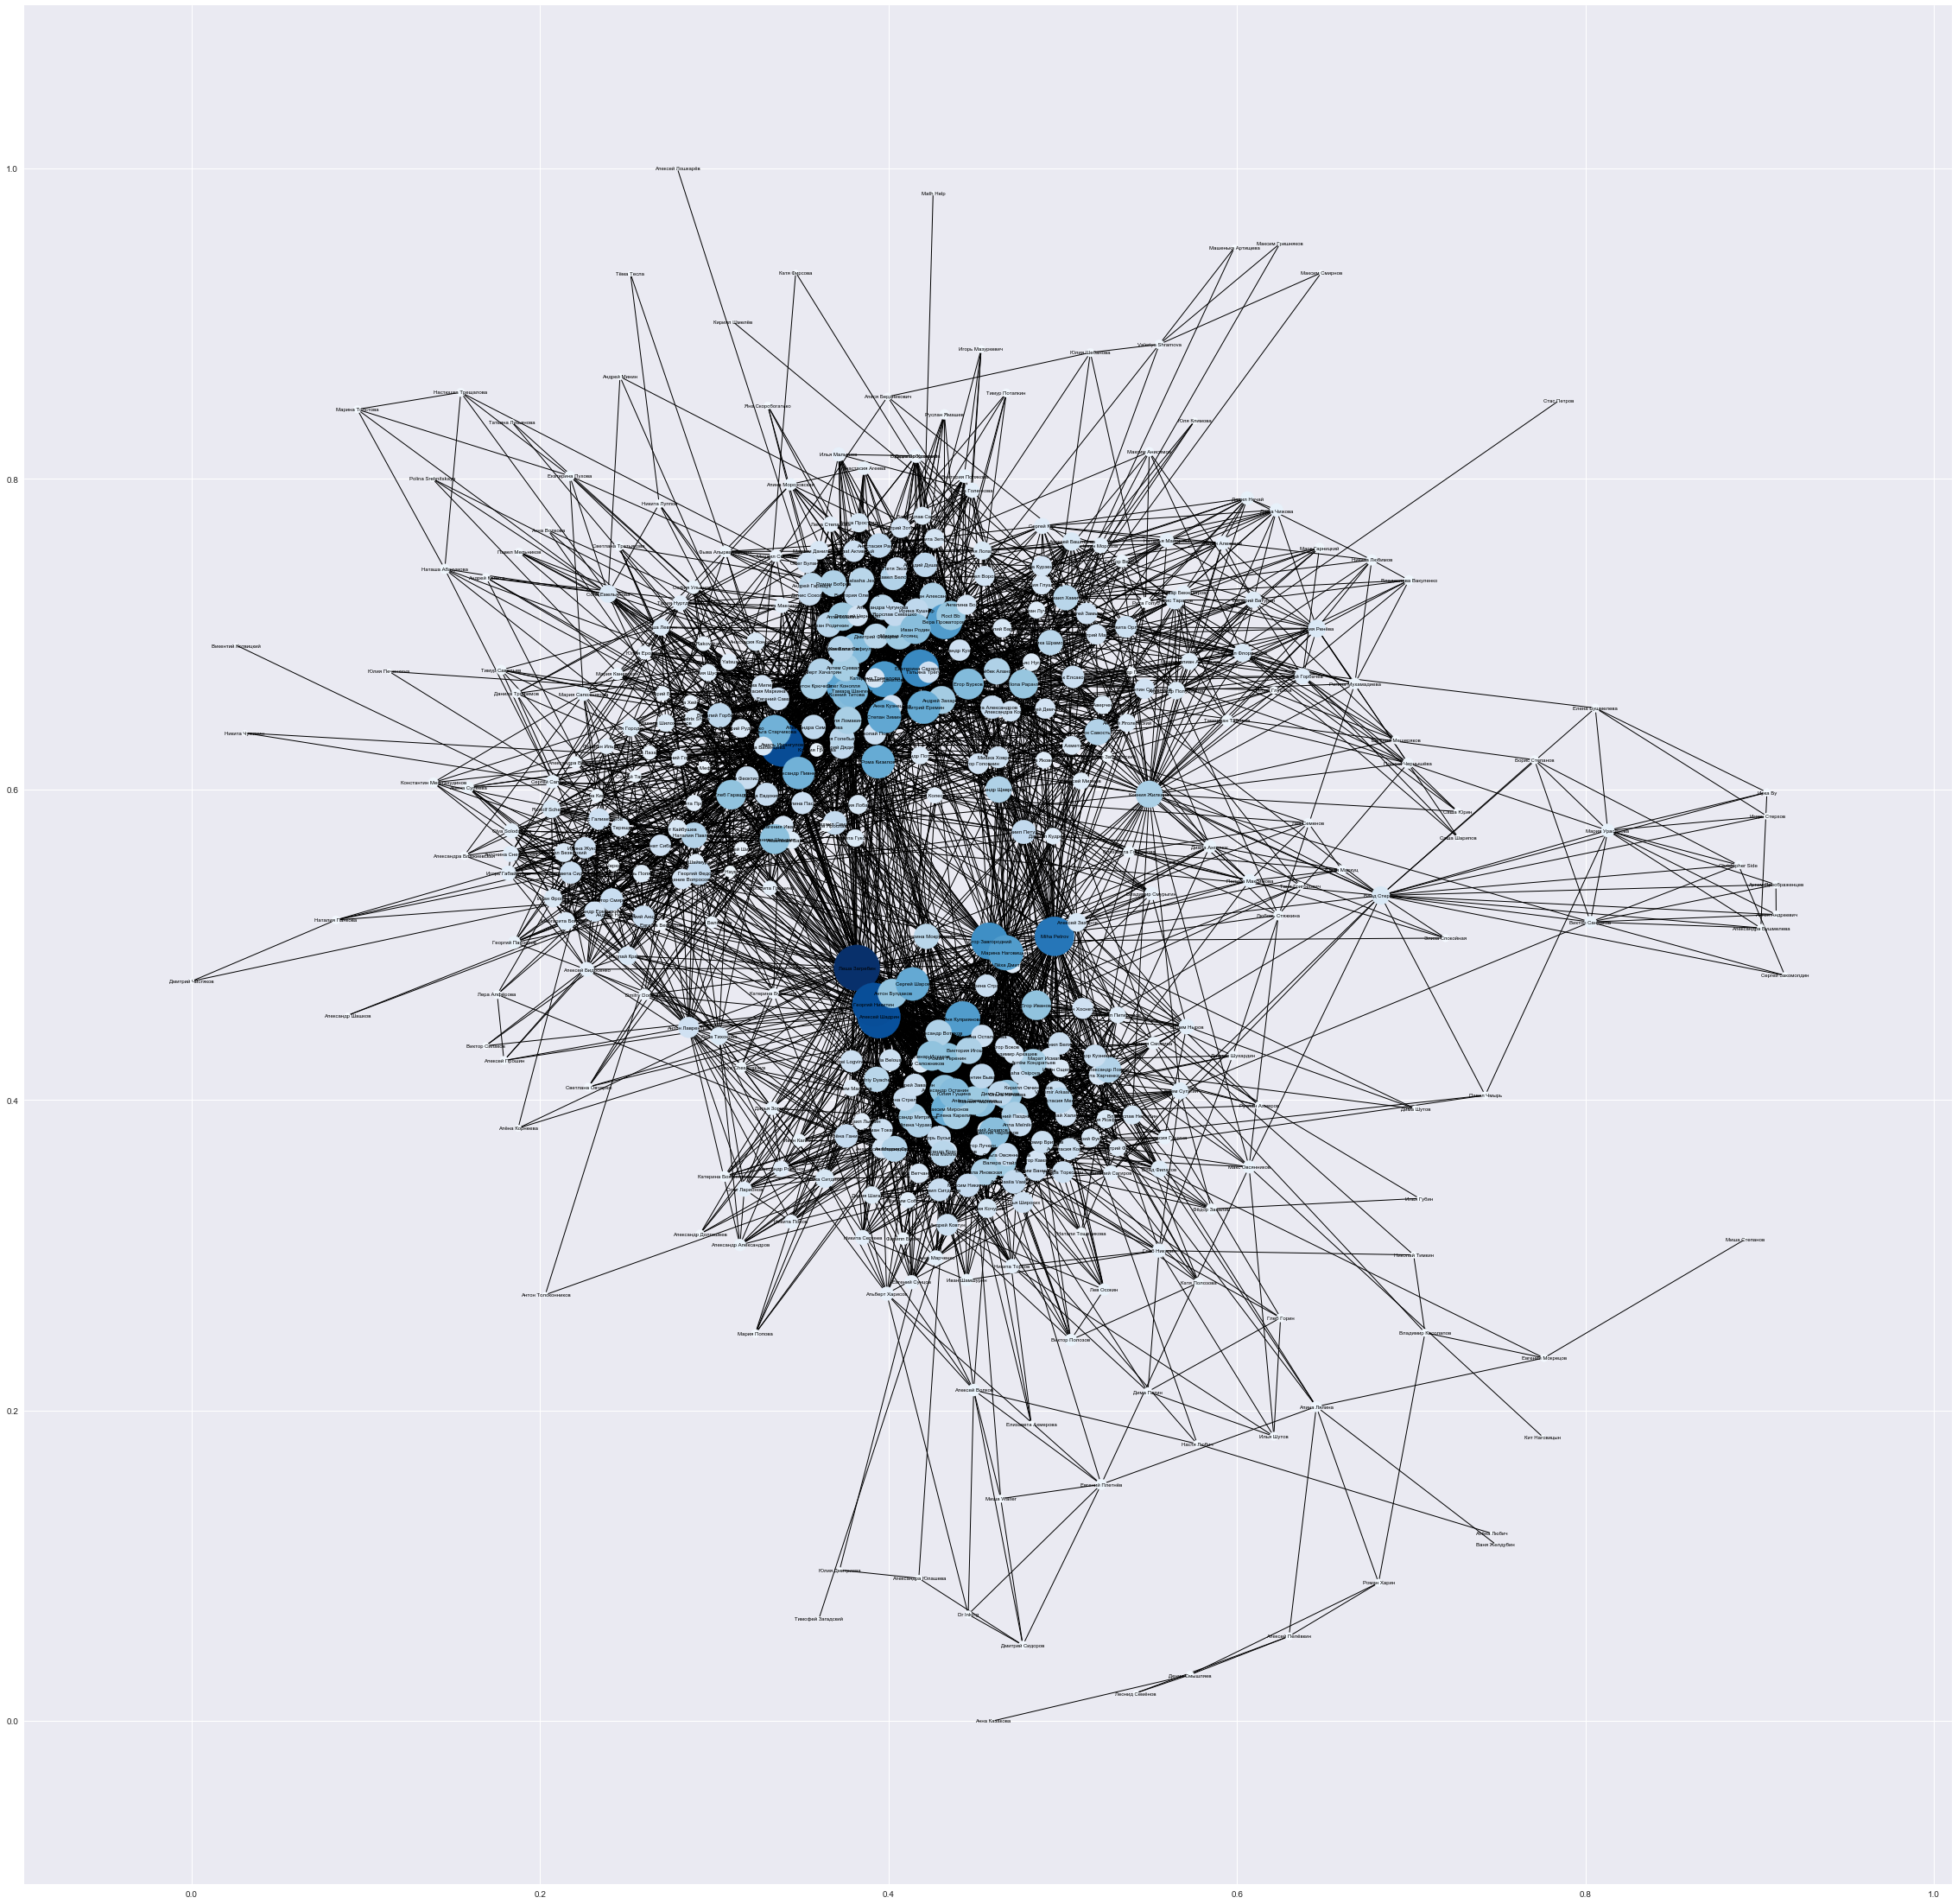

In [7]:
plt.figure(1, figsize=(40,40))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=list(k.keys()),
                 node_size = [d*20 for d in list(k.values())],
                 node_color=list(k.values()),
                 font_size=6,
                 cmap=plt.cm.Blues,
                 with_labels=True
                 )

Это граф для Gephi

In [8]:
nx.write_gexf(G, "my_graph.gexf")

# ДИАМЕТР

In [28]:
diameter = nx.diameter(G.subgraph(max(nx.connected_component_subgraphs(G), key=len)))
diameter

7

# КОЭФФИЦИЕНТ КЛАСТЕРИЗАЦИИ

In [29]:
clust_coef = nx.average_clustering(G)
clust_coef

0.508731394000387

# AVERAGE SHORTEST PATH LENGTH

In [30]:
avg_short_path = nx.average_shortest_path_length(G)
avg_short_path

2.5941723538070387

Похоже, что это был временный чанк для загрузки в gephi, уже не помню, что он делал...

In [31]:
# pd.DataFrame(list(k.items()), columns=["vk_id", "degree"]).to_csv("mygraph.csv")

NameError: name 'k' is not defined

# РАСПРЕДЕЛЕНИЕ ВЕРШИН

In [37]:
k_new = sorted(k1.items(), key=operator.itemgetter(1), reverse=True)
k_new = [x[0] for x in k_new]
for i in range(0,11):
    print_info_about(i+1, k_new[i], G1)

1. Леша Загребин 141
2. Амаль Имангулов 126
3. Георгий Никитин 126
4. Алексей Шадрин 125
5. Miha Petrov 104
6. Екатерина Сахарова 93
7. Егор Завгородний 90
8. Павел Данилов 85
9. Аня Куприянова 82
10. Марина Наговицына 82
11. Вера Проваторова 82


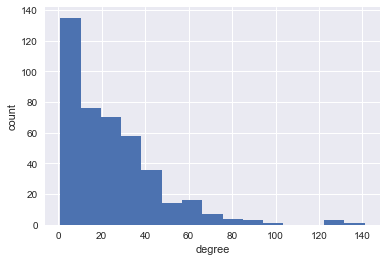

In [39]:
plt.hist(list(G.degree().values()), bins=15)
plt.ylabel('count')
plt.xlabel('degree')

#### Топ10 по degree centrality

In [64]:
k_new = sorted(nx.degree(G).items(), key=operator.itemgetter(1), reverse=True)
for i in range(0,11):
    print(str(i+1)+". ", k_new[i][0], k_new[i][1])

1.  Леша Загребин 141
2.  Амаль Имангулов 126
3.  Георгий Никитин 125
4.  Алексей Шадрин 124
5.  Miha Petrov 103
6.  Екатерина Сахарова 93
7.  Егор Завгородний 90
8.  Павел Данилов 85
9.  Вера Проваторова 82
10.  Аня Куприянова 82
11.  Марина Наговицына 82


# BETWENNESS CENTRALITY

In [41]:
bc = nx.betweenness_centrality(G)

#### Топ10 по betweenness centrality

In [42]:
k_bc = sorted(bc.items(), key=operator.itemgetter(1), reverse=True)
for i in range(0,11):
    print(str(i+1)+". ", k_bc[i][0], k_bc[i][1])

1.  Леша Загребин 0.08163548584325638
2.  Амаль Имангулов 0.07876352100647693
3.  Miha Petrov 0.07754571845803186
4.  Егор Завгородний 0.07728006781085234
5.  Алексей Шадрин 0.06841680551022343
6.  Георгий Никитин 0.05731699050606005
7.  Ксения Жилкина 0.05356563942745513
8.  Вика Шрамова 0.0389484041403894
9.  Екатерина Сахарова 0.036785856169597286
10.  Марина Наговицына 0.035997777103811
11.  Влад Стерхов 0.034824053237311706


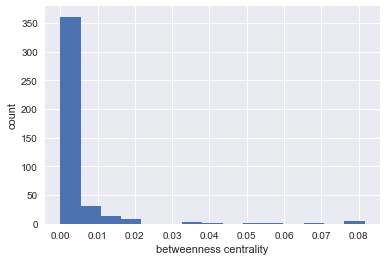

In [43]:
plt.hist(list(bc.values()), bins=15)
plt.ylabel('count')
plt.xlabel('betweenness centrality')

# CLOSENESS CENTRALITY

In [44]:
cc = nx.closeness_centrality(G)

#### Топ10 по closeness centrality

In [45]:
k_cc = sorted(cc.items(), key=operator.itemgetter(1), reverse=True)
for i in range(0,11):
    print(str(i+1)+". ", k_cc[i][0], k_cc[i][1])

1.  Леша Загребин 0.5472186287192755
2.  Амаль Имангулов 0.5465116279069767
3.  Алексей Шадрин 0.5388535031847134
4.  Miha Petrov 0.5388535031847134
5.  Егор Завгородний 0.5347661188369153
6.  Георгий Никитин 0.52875
7.  Екатерина Сахарова 0.5215782983970407
8.  Марина Наговицына 0.5029726516052319
9.  Павел Данилов 0.5011848341232228
10.  Даниил Шмырин 0.4901506373117034
11.  Степан Зимин 0.4873271889400922


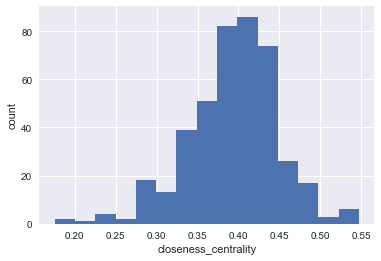

In [46]:
plt.hist(list(cc.values()), bins=15)
plt.ylabel('count')
plt.xlabel('closeness_centrality')

# PAGERANK

In [49]:
pr = nx.pagerank(G)

#### Топ10 по pagerank

In [50]:
k_pr = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)
for i in range(0,11):
    print(str(i+1)+". ", k_pr[i][0], k_pr[i][1])

1.  Леша Загребин 0.01122956047126623
2.  Амаль Имангулов 0.01101167429477217
3.  Георгий Никитин 0.010231330870541797
4.  Алексей Шадрин 0.01022657220665075
5.  Miha Petrov 0.0088234731044878
6.  Егор Завгородний 0.008581876367287408
7.  Екатерина Сахарова 0.007926876664506302
8.  Павел Данилов 0.006833099312628144
9.  Вера Проваторова 0.006733101996188511
10.  Марина Наговицына 0.006544021771516789
11.  Аня Куприянова 0.006490211991579692


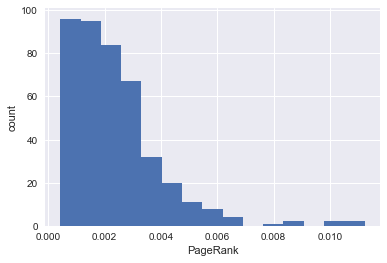

In [52]:
plt.hist(list(pr.values()), bins=15)
plt.ylabel("count")
plt.xlabel("PageRank")

In [ ]:
pr, cc, bc, nx.degree(G)

In [54]:
def scatter_compare_centrality(dict1, dict2, name1, name2):
    x, y = [], []
    for item in pr.items():
        name = item[0]
        x.append(item[1])
        y.append(dict2[name])
    plt.scatter(x, y)
    plt.ylabel(name2)
    plt.xlabel(name1)
    return

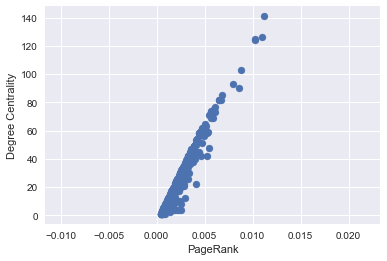

In [55]:
scatter_compare_centrality(pr, nx.degree(G), "PageRank", "Degree Centrality")

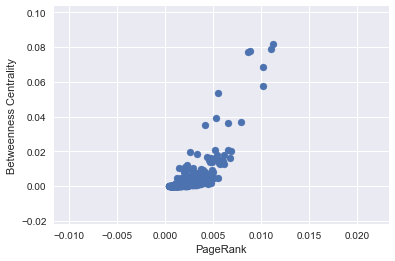

In [56]:
scatter_compare_centrality(pr, bc, "PageRank", "Betweenness Centrality")

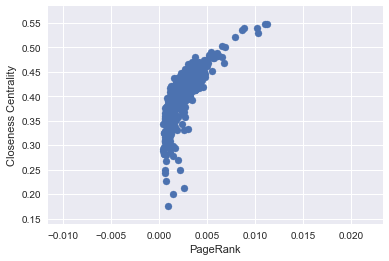

In [57]:
scatter_compare_centrality(pr, cc, "PageRank", "Closeness Centrality")

In [65]:
k_new

[('Леша Загребин', 141),
 ('Амаль Имангулов', 126),
 ('Георгий Никитин', 125),
 ('Алексей Шадрин', 124),
 ('Miha Petrov', 103),
 ('Екатерина Сахарова', 93),
 ('Егор Завгородний', 90),
 ('Павел Данилов', 85),
 ('Вера Проваторова', 82),
 ('Аня Куприянова', 82),
 ('Марина Наговицына', 82),
 ('Олег Конопля', 77),
 ('Степан Зимин', 75),
 ('Сергей Шаров', 74),
 ('Дмитрий Еремин', 73),
 ('Рома Кизилов', 73),
 ('Максим Миронов', 71),
 ('Ольга Старчикова', 69),
 ('Александр Пивненко', 69),
 ('Тамара Шангина', 65),
 ('Егор Бурков', 63),
 ('Камилла Сафиуллина', 62),
 ('Ксения Титова', 62),
 ('Юлия Гущина', 62),
 ('Иван Родин', 61),
 ('Валентин Чернецов', 61),
 ('Ксения Чистякова', 60),
 ('Даниил Шмырин', 59),
 ('Роман Теренин', 59),
 ('Глеб Гаращук', 58),
 ('Александр Останин', 58),
 ('Егор Иванов', 58),
 ('Ленар Исхаков', 58),
 ('Ольга Нечаева', 57),
 ('Антон Булдаков', 57),
 ('Ilona Papava', 56),
 ('Roct Bb', 56),
 ('Марина Атоянц', 54),
 ('Алёна Шамшурина', 54),
 ('Anna Lukutina', 53),
 ('Вале

In [67]:
pd.DataFrame({
    "degree" : [x[0] for x in k_new][:10],
    "betweenness" : [x[0] for x in k_bc][:10],
    "closeness" : [x[0] for x in k_cc][:10],
    "pagerank" : [x[0] for x in k_pr][:10]})

,betweenness,closeness,degree,pagerank
0,Леша Загребин,Леша Загребин,Леша Загребин,Леша Загребин
1,Амаль Имангулов,Амаль Имангулов,Амаль Имангулов,Амаль Имангулов
2,Miha Petrov,Алексей Шадрин,Георгий Никитин,Георгий Никитин
3,Егор Завгородний,Miha Petrov,Алексей Шадрин,Алексей Шадрин
4,Алексей Шадрин,Егор Завгородний,Miha Petrov,Miha Petrov
5,Георгий Никитин,Георгий Никитин,Екатерина Сахарова,Егор Завгородний
6,Ксения Жилкина,Екатерина Сахарова,Егор Завгородний,Екатерина Сахарова
7,Вика Шрамова,Марина Наговицына,Павел Данилов,Павел Данилов
8,Екатерина Сахарова,Павел Данилов,Вера Проваторова,Вера Проваторова
9,Марина Наговицына,Даниил Шмырин,Аня Куприянова,Марина Наговицына


# DISTANCE SIMILARITIES

Тут короч матрица смежности, корреляции, Евклидово и косинусное расстояния

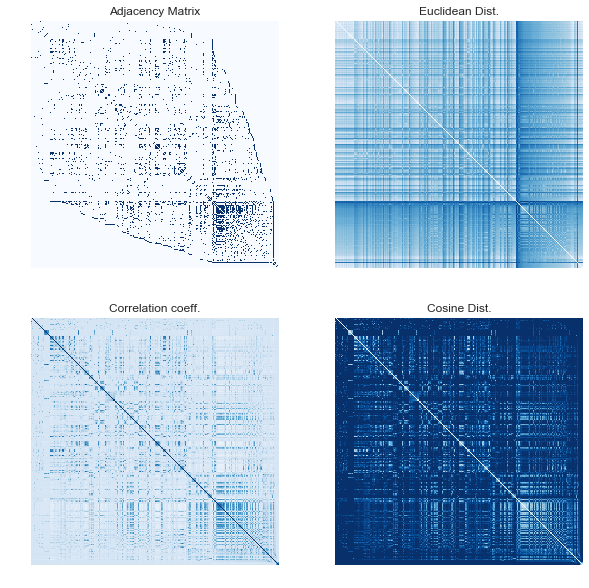

In [172]:
def plotDist(G):
    rcm = nx.utils.reverse_cuthill_mckee_ordering(G)
    A = nx.to_numpy_matrix(G, dtype=int, nodelist=list(rcm))
    A = np.asarray(A)
    f, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0, 0].imshow(A, cmap = 'Blues', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    ax[0, 0].axis('off')
    
    D = np.corrcoef(A)
    ax[1, 0].imshow(D, cmap = 'Blues', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')
    ax[1, 0].axis('off')
    
    dVec_euc = spt.distance.pdist(A, metric = 'euclidean')
    dVec_euc = spt.distance.squareform(dVec_euc)
    ax[0, 1].imshow(dVec_euc, cmap = 'Blues', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')
    ax[0, 1].axis('off')
    
    dVec_cos = spt.distance.pdist(A, metric = 'cosine')
    dVec_cos = spt.distance.squareform(dVec_cos)
    ax[1, 1].imshow(dVec_cos, cmap = 'Blues', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')
    ax[1, 1].axis('off')    
    return A, D, dVec_euc, dVec_cos


A, D, euc, cos = plotDist(G)

Похожие друг на друга личности

In [58]:
nodes = G.nodes()
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)
dVec_euc = spt.distance.pdist(A, metric = 'cosine')
dVec_euc = spt.distance.squareform(dVec_euc)
similar_friends = []
for i in range(len(dVec_euc)):
    for j in range(i+1, len(dVec_euc[i])):
        if dVec_euc[i,j] < 0.2 and i != j:
            similar_friends.append((nodes[i], nodes[j], float(dVec_euc[i,j])))
similar_friends = sorted(similar_friends, key=operator.itemgetter(2))
pd.set_option('display.precision',2)
similar_friends = pd.DataFrame(similar_friends, columns=['friend_1', 'friend_2', 'dist'])
similar_friends['dist'] = similar_friends['dist'].apply(lambda x: '{:.4f}'.format(x))
similar_friends.head(7)

,friend_1,friend_2,dist
0,Машенька Артищева,Максим Гришняков,0.0000
1,Машенька Артищева,Максим Смирнов,0.0000
2,Максим Гришняков,Максим Смирнов,0.0000
3,Ирка Бу,Игорь Стерхов,0.1340
4,Александр Останин,Ленар Исхаков,0.1379
5,Елизавета Сидорова,Виктор Смирнов,0.1511
6,Ирина Жукова,Виктор Смирнов,0.1546


# CLIQUES

Функция из лабы, которая работала вечность.

In [82]:
def FindKCliques(G, k):
    n = G.order()
    V = G.nodes()
    kCliques = []
    # Iterate over sizes
    for grSize in range(n, 1, -1):
        # Iterate over subgraphs
        for subV in itertools.combinations(V, grSize):
            # Not included in maximal and all distances are <= k
            if not any([set(subV).issubset(kcl) for kcl in kCliques]):
                if all([nx.shortest_path_length(G, pairs[0], pairs[1]) <= k for pairs in itertools.combinations(subV, 2)]):
                        kCliques.append(subV)
            
    return kCliques

Вместо нее использовал встроенную. Она мне понравилась больше.

На результате получаем cliques - это топовые клики

In [68]:
cliques = []
for i in nx.find_cliques(G):
    cliques.append((i, len(i)))
cliques = sorted(cliques, key=lambda tup: tup[1], reverse = True)

Взглянем на максимальный размер клик

In [69]:
[x[1] for x in cliques[:15]]

[20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]

Ага, двадцать. И их четыре штуки. Ради интереса глянем, кто там

In [70]:
for i in cliques[:4]:
    print(str(i[0]))

['Павел Данилов', 'Амаль Имангулов', 'Екатерина Сахарова', 'Тамара Шангина', 'Олег Конопля', 'Ксения Титова', 'Рома Кизилов', 'Камилла Сафиуллина', 'Степан Зимин', 'Антон Крючков', 'Оля Ломакина', 'Александр Пивненко', 'Артем Суевалов', 'Роман Бобров', 'Карен Валитов', 'Anna Lukutina', 'Natasha Jess', 'Ольга Старчикова', 'Марина Атоянц', 'Роберт Хачатрян']
['Павел Данилов', 'Амаль Имангулов', 'Екатерина Сахарова', 'Тамара Шангина', 'Олег Конопля', 'Ксения Титова', 'Рома Кизилов', 'Камилла Сафиуллина', 'Степан Зимин', 'Антон Крючков', 'Оля Ломакина', 'Александр Пивненко', 'Артем Суевалов', 'Роман Бобров', 'Карен Валитов', 'Anna Lukutina', 'Natasha Jess', 'Ольга Старчикова', 'Марина Атоянц', 'Вера Проваторова']
['Павел Данилов', 'Егор Бурков', 'Екатерина Сахарова', 'Роберт Хачатрян', 'Ксения Титова', 'Тамара Шангина', 'Роман Бобров', 'Карен Валитов', 'Anna Lukutina', 'Марина Атоянц', 'Оля Ломакина', 'Natasha Jess', 'Степан Зимин', 'Ольга Старчикова', 'Камилла Сафиуллина', 'Артем Суевалов

Ну а здесь смотрим, какие люди попали в эти максимальные клики сколько раз

In [71]:
names_in_top_clique = [item for sublist in [x[0] for x in cliques[:4]] for item in sublist]

In [72]:
d = {}
for name in names_in_top_clique:
    d[name] = names_in_top_clique.count(name)
sorted(d.items(), key=operator.itemgetter(1), reverse=True)

[('Павел Данилов', 4),
 ('Екатерина Сахарова', 4),
 ('Тамара Шангина', 4),
 ('Олег Конопля', 4),
 ('Ксения Титова', 4),
 ('Рома Кизилов', 4),
 ('Камилла Сафиуллина', 4),
 ('Степан Зимин', 4),
 ('Антон Крючков', 4),
 ('Оля Ломакина', 4),
 ('Александр Пивненко', 4),
 ('Артем Суевалов', 4),
 ('Роман Бобров', 4),
 ('Карен Валитов', 4),
 ('Anna Lukutina', 4),
 ('Natasha Jess', 4),
 ('Ольга Старчикова', 4),
 ('Марина Атоянц', 4),
 ('Амаль Имангулов', 2),
 ('Роберт Хачатрян', 2),
 ('Вера Проваторова', 2),
 ('Егор Бурков', 2)]

Какая неожиданность, везде одни и те же. Справедливости ради, все ребята с моего курса ФКН (кроме Александра Пивненко), так что это в какой-то степени отображает коммьюнити

Ну а тут просто построим гистрограммку по кликам

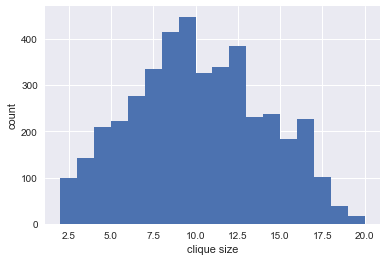

In [73]:
plt.hist([x[1] for x in cliques], bins=18)
plt.ylabel("count")
plt.xlabel("clique size")

# k-core

Здесь я запускал специальную функцию для поиска k-core, импортировал в файл, оттуда в Gephi. Напомню, там красивее.

In [139]:
d = nx.core_number(G)
cocore = pd.Series(d)

In [153]:
cocore

Anastasiia Vasiullina    23
Andrei Logvinenko        22
Anna Lukutina            24
Anna Melnikova           23
Anna Rakovskaya          11
Beatrix Sharp            16
Christopher Side          4
Dasha Osipova            23
Dmitriy Dyachenko        23
Dmitry Doroshko           8
Dr Inking                 4
Ilona Papava             20
Kirill Yatsushko         11
Maria Belousova          23
Math Help                 1
Miha Petrov              23
Natasha Jess             24
Olya Solodskaya          13
Polina Srebnitskaya       3
Primat Активный          23
Roct Bb                  24
Rudolf Schenker          17
Sonya Cheshirskaya        8
Valeriya Shramova         3
Vladimir Arkashev        23
Айбек Аланов             20
Александр Александров    10
Александр Вотяков        23
Александр Долгошеев       5
Александр Ермишкин       17
                         ..
Тамерлан Таболов          8
Таня Григорович           4
Таня Лопатюк             17
Татьяна Лукьянова         2
Татьяна Трегубова   

In [152]:
cocore.to_csv("filename.csv")

# RANDOM GENERATION

На каждую вероятность генерим по несколько графов и берем среднее значение. После этого рассматривается такая вот странная величина - смотрим, во сколько раз каждая из характеристик отклонилась от значения в моем графе, затем по всем характеристикам смотрим среднее и получаем число. Чем меньше число, тем лучше. Просто нужна была какая-то метрика, чтобы оценить "похожесть" графа, ну я вот выбрал такую

### Erdos-Renyi model

In [13]:
# get diameter, clustering coefficient, avg shortest path, number of edges, avg degree
def get_common_info(nG):
    nG_sub = nG.subgraph(max(nx.connected_component_subgraphs(nG), key=len))
    ndiameter = nx.diameter(nG_sub)
    nclust_coef = nx.average_clustering(nG_sub)
    navg_short_path = nx.average_shortest_path_length(nG_sub)
    return [ndiameter, nclust_coef, navg_short_path, len(nG.edges()), sum(nx.degree(nG).values())/n]

In [14]:
n = len(G.nodes())
true_params = [diameter, clust_coef, avg_short_path, len(G.edges()), sum(nx.degree(G).values())/n]

In [29]:
stats_er = []
iter = 10
for p in np.linspace(0.1, 0.9, 9):
    print("start iteration with p =", p, end='')
    cur_p_stats = []
    for i in range(iter):
        nG = nx.erdos_renyi_graph(n=n, p=p)
        cur_p_stats.append(get_common_info(nG))
        # to check the progress
        print("|", end='')
    print()
    stats_er.append((np.mean(cur_p_stats, axis=0), p))
print([diameter, clust_coef, avg_short_path, len(G.edges())])

start iteration with p = 0.1||||||||||
start iteration with p = 0.2||||||||||
start iteration with p = 0.3||||||||||
start iteration with p = 0.4||||||||||
start iteration with p = 0.5||||||||||
start iteration with p = 0.6||||||||||
start iteration with p = 0.7||||||||||
start iteration with p = 0.8||||||||||
start iteration with p = 0.9||||||||||
[7, 0.508731394000387, 2.5941723538070387, 5161]


In [30]:
df_er = pd.DataFrame([x[0] for x in stats_er], 
                   columns=['diameter', 'clustering', 'avg_shortest_path', 
                            'number_of_edges', 'avg_degree'])
df_er['p'] = [x[1] for x in stats_er]
df_er

,diameter,clustering,avg_shortest_path,number_of_edges,avg_degree,p
0,3.0,0.100001,1.912178,8986.2,42.387736,0.1
1,2.0,0.200498,1.799383,17990.5,84.860849,0.2
2,2.0,0.299637,1.700319,26874.2,126.765094,0.3
3,2.0,0.400441,1.599737,35894.0,169.311321,0.4
4,2.0,0.499934,1.500191,44820.9,211.419340,0.5
5,2.0,0.599227,1.400734,53739.8,253.489623,0.6
6,2.0,0.699300,1.300696,62710.8,295.805660,0.7
7,2.0,0.800031,1.199981,71742.5,338.408019,0.8
8,2.0,0.899775,1.100222,80688.5,380.606132,0.9


In [31]:
df_er1 = df_er.copy()
df_er1['diameter'] = abs(pd.to_numeric(df_er1['diameter']) - true_params[0]) / true_params[0]
df_er1['clustering'] = abs(pd.to_numeric(df_er1['clustering']) - true_params[1]) / true_params[1]
df_er1['avg_shortest_path'] = abs(pd.to_numeric(df_er1['avg_shortest_path']) - true_params[2]) / true_params[2]
df_er1['number_of_edges'] = abs(pd.to_numeric(df_er1['number_of_edges']) - true_params[3]) / true_params[3]
df_er1['avg_degree'] = abs(pd.to_numeric(df_er1['avg_degree']) - true_params[4]) / true_params[4]
df_er1.head()

,diameter,clustering,avg_shortest_path,number_of_edges,avg_degree,p
0,0.571429,0.803431,0.262895,0.741174,0.741174,0.1
1,0.714286,0.605886,0.306375,2.485855,2.485855,0.2
2,0.714286,0.411012,0.344562,4.207169,4.207169,0.3
3,0.714286,0.212864,0.383334,5.954854,5.954854,0.4
4,0.714286,0.017293,0.421707,7.684538,7.684538,0.5


In [32]:
df_er2 = df_er1[['diameter', 'clustering', 'avg_shortest_path', 
                            'number_of_edges']]
idx_er = df_er2.mean(axis=1).idxmin()
idx_er

0

In [33]:
df_er.iloc[idx_er,:]

diameter                3.000000
clustering              0.100001
avg_shortest_path       1.912178
number_of_edges      8986.200000
avg_degree             42.387736
p                       0.100000
Name: 0, dtype: float64

In [34]:
df_er2.mean(axis=1)[idx_er]

0.59473209030647922

## Watts-Strogatz model

In [35]:
stats_ws = []
iter = 10
for p in np.linspace(0.1, 0.9, 5):
    print("start iteration with p =", p)
    cur_p_stats = []
    for k in range(2, int(n/4), int(n/40)):
        print("start iteration with k =", k, end='\t')
        for i in range(iter):
            nG = nx.watts_strogatz_graph(n=n, k=k, p=p, seed=None)
            cur_p_stats.append(get_common_info(nG))
            # to check the progress
            print("|", end='')
        print()
        stats_ws.append((np.mean(cur_p_stats, axis=0), p, k))
print("SUCCESS")
print([diameter, clust_coef, avg_short_path, len(G.edges())])

start iteration with p = 0.1
start iteration with k = 2	||||||||||
start iteration with k = 12	||||||||||
start iteration with k = 22	||||||||||
start iteration with k = 32	||||||||||
start iteration with k = 42	||||||||||
start iteration with k = 52	||||||||||
start iteration with k = 62	||||||||||
start iteration with k = 72	||||||||||
start iteration with k = 82	||||||||||
start iteration with k = 92	||||||||||
start iteration with k = 102	||||||||||
start iteration with p = 0.3
start iteration with k = 2	||||||||||
start iteration with k = 12	||||||||||
start iteration with k = 22	||||||||||
start iteration with k = 32	||||||||||
start iteration with k = 42	||||||||||
start iteration with k = 52	||||||||||
start iteration with k = 62	||||||||||
start iteration with k = 72	||||||||||
start iteration with k = 82	||||||||||
start iteration with k = 92	||||||||||
start iteration with k = 102	||||||||||
start iteration with p = 0.5
start iteration with k = 2	||||||||||
start iteration w

In [37]:
df_ws = pd.DataFrame([x[0] for x in stats_ws], 
                   columns=['diameter', 'clustering', 'avg_shortest_path', 
                            'number_of_edges', 'avg_degree'])
df_ws['p'] = [x[1] for x in stats_ws]
df_ws['k'] = [x[2] for x in stats_ws]
df_ws['clustering'] = df_ws['clustering'].apply(lambda x: '{:.4f}'.format(x))
df_ws.head()

,diameter,clustering,avg_shortest_path,number_of_edges,avg_degree,p,k
0,120.800,0.0000,43.398963,424.0,2.0,0.1,2
1,63.400,0.2505,23.429549,1484.0,7.0,0.1,12
2,43.600,0.3432,16.519192,2544.0,12.0,0.1,22
3,33.675,0.3918,12.999032,3604.0,17.0,0.1,32
4,27.540,0.4225,10.845982,4664.0,22.0,0.1,42


In [40]:
true_params = [diameter, clust_coef, avg_short_path, len(G.edges()), sum(nx.degree(G).values())/n]

In [41]:
df_ws1 = df_ws.copy()
df_ws1['diameter'] = abs(pd.to_numeric(df_ws1['diameter']) - true_params[0]) / true_params[0]
df_ws1['clustering'] = abs(pd.to_numeric(df_ws1['clustering']) - true_params[1]) / true_params[1]
df_ws1['avg_shortest_path'] = abs(pd.to_numeric(df_ws1['avg_shortest_path']) - true_params[2]) / true_params[2]
df_ws1['number_of_edges'] = abs(pd.to_numeric(df_ws1['number_of_edges']) - true_params[3]) / true_params[3]
df_ws1['avg_degree'] = abs(pd.to_numeric(df_ws1['avg_degree']) - true_params[4]) / true_params[4]
df_ws1.head()

,diameter,clustering,avg_shortest_path,number_of_edges,avg_degree,p,k
0,16.257143,1.000000,15.729406,0.917845,0.917845,0.1,2
1,8.057143,0.507599,8.031608,0.712459,0.712459,0.1,12
2,5.228571,0.325381,5.367808,0.507072,0.507072,0.1,22
3,3.810714,0.229849,4.010859,0.301686,0.301686,0.1,32
4,2.934286,0.169503,3.180903,0.096299,0.096299,0.1,42


In [42]:
df_ws2 = df_ws1[['diameter', 'clustering', 'avg_shortest_path', 
                            'number_of_edges']]
idx_ws = df_ws2.mean(axis=1).idxmin()
idx_ws

31

In [43]:
df_ws.iloc[idx_ws,:]

diameter                8.31
clustering            0.1607
avg_shortest_path    4.00089
number_of_edges         9964
avg_degree                47
p                        0.5
k                         92
Name: 31, dtype: object

In [44]:
df_ws2.mean(axis=1)[idx_ws]

0.58603862621249092

In [45]:
true_params

[7, 0.508731394000387, 2.5941723538070387, 5161, 24.34433962264151]

## BARABASI-ALBERT model

In [19]:
stats_ba = []
iter = 10
for m in np.linspace(5, 100, 20):
    print("start iteration with m =", m, end='')
    cur_m_stats = []
    for i in range(iter):
        nG = nx.barabasi_albert_graph(n=n, m=int(m))
        cur_m_stats.append(get_common_info(nG))
        # to check the progress
        print("|", end='')
    print()
    stats_ba.append((np.mean(cur_m_stats, axis=0), m))

start iteration with m = 5.0||||||||||
start iteration with m = 10.0||||||||||
start iteration with m = 15.0||||||||||
start iteration with m = 20.0||||||||||
start iteration with m = 25.0||||||||||
start iteration with m = 30.0||||||||||
start iteration with m = 35.0||||||||||
start iteration with m = 40.0||||||||||
start iteration with m = 45.0||||||||||
start iteration with m = 50.0||||||||||
start iteration with m = 55.0||||||||||
start iteration with m = 60.0||||||||||
start iteration with m = 65.0||||||||||
start iteration with m = 70.0||||||||||
start iteration with m = 75.0||||||||||
start iteration with m = 80.0||||||||||
start iteration with m = 85.0||||||||||
start iteration with m = 90.0||||||||||
start iteration with m = 95.0||||||||||
start iteration with m = 100.0||||||||||


In [21]:
df_ba = pd.DataFrame([x[0] for x in stats_ba], 
                   columns=['diameter', 'clustering', 'avg_shortest_path', 
                            'number_of_edges'])
df_ba['m'] = [x[1] for x in stats_ba]
df_ba['clustering'] = df_ba['clustering'].apply(lambda x: '{:.4f}'.format(x))
df_ba.head()

,diameter,clustering,avg_shortest_path,number_of_edges,avg_degree,m
0,4.2,0.0777,2.710161,2095.0,9.882075,5.0
1,3.4,0.1107,2.298389,4140.0,19.528302,10.0
2,3.0,0.1419,2.075556,6135.0,28.938679,15.0
3,3.0,0.1705,1.962030,8080.0,38.113208,20.0
4,3.0,0.1956,1.905169,9975.0,47.051887,25.0


In [24]:
df_ba1 = df_ba.copy()
df_ba1['diameter'] = abs(pd.to_numeric(df_ba1['diameter']) - true_params[0]) / true_params[0]
df_ba1['clustering'] = abs(pd.to_numeric(df_ba1['clustering']) - true_params[1]) / true_params[1]
df_ba1['avg_shortest_path'] = abs(pd.to_numeric(df_ba1['avg_shortest_path']) - true_params[2]) / true_params[2]
df_ba1['number_of_edges'] = abs(pd.to_numeric(df_ba1['number_of_edges']) - true_params[3]) / true_params[3]
df_ba1['avg_degree'] = abs(pd.to_numeric(df_ba1['avg_degree']) - true_params[4]) / true_params[4]
df_ba1.head()

,diameter,clustering,avg_shortest_path,number_of_edges,avg_degree,m
0,0.400000,0.847267,0.044711,0.594071,0.594071,5.0
1,0.514286,0.782400,0.114019,0.197830,0.197830,10.0
2,0.571429,0.721071,0.199916,0.188723,0.188723,15.0
3,0.571429,0.664853,0.243678,0.565588,0.565588,20.0
4,0.571429,0.615514,0.265597,0.932765,0.932765,25.0


In [25]:
df_ba2 = df_ba1[['diameter', 'clustering', 'avg_shortest_path', 
                            'number_of_edges']]
idx_ba = df_ba2.mean(axis=1).idxmin()
idx_ba

1

In [26]:
df_ba.iloc[idx_ba,:]

diameter                 3.4
clustering            0.1107
avg_shortest_path    2.29839
number_of_edges         4140
avg_degree           19.5283
m                         10
Name: 1, dtype: object

Почему диаметр дробный - потому что бралось 10 графов для каждого параметра и все характеристики брались средние по ним. Ну здесь, судя по всему, было штук 6 графов с диаметром 3 и штуки 4 с диаметром 4

In [27]:
df_ba2.mean(axis=1)[idx_ba]

0.40213350585817076

Зато этот показатель получился прям неплохой...

In [28]:
true_params

[7, 0.508731394000387, 2.5941723538070387, 5161, 24.34433962264151]

In [46]:
df_er

,diameter,clustering,avg_shortest_path,number_of_edges,avg_degree,p
0,3.0,0.100001,1.912178,8986.2,42.387736,0.1
1,2.0,0.200498,1.799383,17990.5,84.860849,0.2
2,2.0,0.299637,1.700319,26874.2,126.765094,0.3
3,2.0,0.400441,1.599737,35894.0,169.311321,0.4
4,2.0,0.499934,1.500191,44820.9,211.419340,0.5
5,2.0,0.599227,1.400734,53739.8,253.489623,0.6
6,2.0,0.699300,1.300696,62710.8,295.805660,0.7
7,2.0,0.800031,1.199981,71742.5,338.408019,0.8
8,2.0,0.899775,1.100222,80688.5,380.606132,0.9


In [48]:
df_ws

,diameter,clustering,avg_shortest_path,number_of_edges,avg_degree,p,k
0,120.800000,0.0000,43.398963,424.0,2.0,0.1,2
1,63.400000,0.2505,23.429549,1484.0,7.0,0.1,12
2,43.600000,0.3432,16.519192,2544.0,12.0,0.1,22
3,33.675000,0.3918,12.999032,3604.0,17.0,0.1,32
4,27.540000,0.4225,10.845982,4664.0,22.0,0.1,42
5,23.450000,0.4439,9.382579,5724.0,27.0,0.1,52
6,20.528571,0.4595,8.319981,6784.0,32.0,0.1,62
7,18.337500,0.4718,7.513570,7844.0,37.0,0.1,72
8,16.633333,0.4824,6.881104,8904.0,42.0,0.1,82
9,15.270000,0.4909,6.371690,9964.0,47.0,0.1,92


In [47]:
df_ba

,diameter,clustering,avg_shortest_path,number_of_edges,avg_degree,m
0,4.2,0.0777,2.710161,2095.0,9.882075,5.0
1,3.4,0.1107,2.298389,4140.0,19.528302,10.0
2,3.0,0.1419,2.075556,6135.0,28.938679,15.0
3,3.0,0.1705,1.962030,8080.0,38.113208,20.0
4,3.0,0.1956,1.905169,9975.0,47.051887,25.0
5,3.0,0.2202,1.872374,11820.0,55.754717,30.0
6,3.0,0.2413,1.849206,13615.0,64.221698,35.0
7,3.0,0.2640,1.828936,15360.0,72.452830,40.0
8,2.9,0.2836,1.809853,17055.0,80.448113,45.0
9,2.4,0.3033,1.791476,18700.0,88.207547,50.0
